In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

In [11]:
df = pd.read_csv('features_early_cycles.csv')

In [12]:
# Güvenli olsun diye kopya al
df = df.copy()

# 1) cycle_life sütununu stringlerden floata çevir
# Örn: "[904.]" -> 904.0
df['cycle_life'] = (
    df['cycle_life']
    .astype(str)                       # hepsini string yap
    .str.strip()                       # boşlukları temizle
    .str.replace('[\[\]]', '', regex=True)  # köşeli parantezleri sil
    .astype(float)                     # floata çevir
)

# 2) Feature kolonlarının da sayısal olduğundan emin ol
feature_cols = ['Qd_mean', 'Qd_std', 'IR_mean', 'IR_std', 'Tavg_mean', 'dQd_slope']

for col in feature_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3) Hem X hem y'de NaN olan satırları at
df = df.dropna(subset=['cycle_life'] + feature_cols)


<>:10: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\['
C:\Users\dicle\AppData\Local\Temp\ipykernel_70600\1643677508.py:10: SyntaxWarning: invalid escape sequence '\['
  .str.replace('[\[\]]', '', regex=True)  # köşeli parantezleri sil


In [13]:
results = {}

for n_cycles in [25, 50, 100]:
    print(f"\n{'='*50}")
    print(f"İlk {n_cycles} döngü ile tahmin")
    print(f"{'='*50}")
    
    df_subset = df[df['n_cycles'] == n_cycles]
    
    # Özellikleri ve hedefi ayır
    X = df_subset[['Qd_mean', 'Qd_std', 'IR_mean', 'IR_std', 'Tavg_mean', 'dQd_slope']]
    y = df_subset['cycle_life']
    
    # Eğit-test ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model eğit
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Tahmin
    y_pred = model.predict(X_test)
    
    # Performans metrikleri
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[n_cycles] = {'MAE': mae, 'R2': r2}
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    print("\nÖzellik Önemi:")
    for feat, imp in zip(X.columns, model.feature_importances_):
        print(f"  {feat}: {imp:.4f}")


İlk 25 döngü ile tahmin
MAE: 148.01
R² Score: -0.4098

Özellik Önemi:
  Qd_mean: 0.0523
  Qd_std: 0.2652
  IR_mean: 0.3877
  IR_std: 0.1602
  Tavg_mean: 0.0982
  dQd_slope: 0.0364

İlk 50 döngü ile tahmin
MAE: 109.30
R² Score: -0.0180

Özellik Önemi:
  Qd_mean: 0.0324
  Qd_std: 0.6189
  IR_mean: 0.1688
  IR_std: 0.1156
  Tavg_mean: 0.0258
  dQd_slope: 0.0386

İlk 100 döngü ile tahmin
MAE: 73.19
R² Score: 0.6709

Özellik Önemi:
  Qd_mean: 0.1711
  Qd_std: 0.0464
  IR_mean: 0.1479
  IR_std: 0.3477
  Tavg_mean: 0.1287
  dQd_slope: 0.1584


In [14]:
print(f"\n{'='*50}")
print("ÖZET - Erken Tahmin Performansı")
print(f"{'='*50}")
for n_cycles, metrics in results.items():
    print(f"İlk {n_cycles} döngü - R²: {metrics['R2']:.4f}, MAE: {metrics['MAE']:.2f}")


ÖZET - Erken Tahmin Performansı
İlk 25 döngü - R²: -0.4098, MAE: 148.01
İlk 50 döngü - R²: -0.0180, MAE: 109.30
İlk 100 döngü - R²: 0.6709, MAE: 73.19


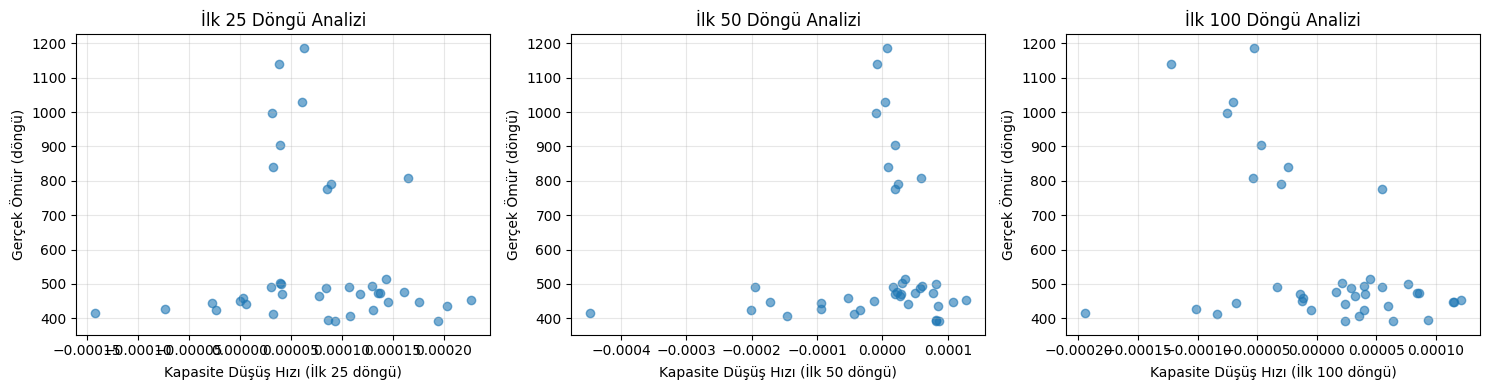

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, n_cycles in enumerate([25, 50, 100]):
    ax = axes[idx]
    
    df_subset = df[df['n_cycles'] == n_cycles]
    
    # Kapasite düşüş hızı vs Ömür
    ax.scatter(df_subset['dQd_slope'], df_subset['cycle_life'], alpha=0.6)
    ax.set_xlabel(f'Kapasite Düşüş Hızı (İlk {n_cycles} döngü)')
    ax.set_ylabel('Gerçek Ömür (döngü)')
    ax.set_title(f'İlk {n_cycles} Döngü Analizi')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('early_prediction_comparison.png', dpi=300)
plt.show()

In [16]:
import pandas as pd

df = pd.read_csv("dqdv_features.csv")

feature_cols = [
    'dqdv_peak_first', 'dqdv_peak_last', 'dqdv_peak_delta',
    'dqdv_peak_mean', 'dqdv_peak_std', 'dqdv_peak_slope',
    'dqdv_area_first', 'dqdv_area_last', 'dqdv_area_delta',
    'dqdv_area_mean', 'dqdv_area_std', 'dqdv_area_slope'
]

# Train-test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

results = {}

for n_cycles in [25, 50, 100]:
    df_subset = df[df["n_cycles"] == n_cycles]

    X = df_subset[feature_cols]
    y = df_subset["cycle_life"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor(
        n_estimators=400,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== İlk {n_cycles} döngü ile tahmin =====")
    print(f"R²: {r2:.4f}, MAE: {mae:.2f}")



ValueError: Input y contains NaN.

In [9]:
# ============================================
# 1) Kütüphaneleri yükle
# ============================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ============================================
# 2) Veriyi yükle
# ============================================
# dqdv_features.csv = extract_dqdv_features ile oluşturduğumuz csv
df = pd.read_csv("dqdv_features.csv")

print("Orijinal satır sayısı:", len(df))
print(df.head())

# ============================================
# 3) cycle_life sütununu temizle (y hedef değişkeni)
# ============================================
df = df.copy()

# cycle_life bazı durumlarda string veya "[904.]" gibi formatlarda olabilir
df["cycle_life"] = (
    df["cycle_life"]
    .astype(str)
    .str.strip()
    .str.replace(r"[\[\]]", "", regex=True)   # köşeli parantezleri sil
)

df["cycle_life"] = pd.to_numeric(df["cycle_life"], errors="coerce")

print("cycle_life içinde NaN sayısı:", df["cycle_life"].isna().sum())

# ============================================
# 4) Özellik kolonlarını tanımla
# ============================================
candidate_features = [
    "dqdv_peak_first", "dqdv_peak_last", "dqdv_peak_delta",
    "dqdv_peak_mean", "dqdv_peak_std", "dqdv_peak_slope",
    "dqdv_area_first", "dqdv_area_last", "dqdv_area_delta",
    "dqdv_area_mean", "dqdv_area_std", "dqdv_area_slope",
]

# Dosyada gerçekten olan kolonları filtrele (hata almamak için)
feature_cols = [c for c in candidate_features if c in df.columns]
print("\nKullanılacak feature kolonları:")
print(feature_cols)

# cycle_life + feature'larda NaN olan satırları at
df = df.dropna(subset=["cycle_life"] + feature_cols)
print("\nTemizlik sonrası satır sayısı:", len(df))

# ============================================
# 5) Her n_cycles için ayrı model eğit ve değerlendir
# ============================================
results = {}

for n_cycles in [25, 50, 100]:
    print(f"\n{'='*60}")
    print(f"n_cycles = {n_cycles} için model eğitimi")
    print(f"{'='*60}")
    
    df_subset = df[df["n_cycles"] == n_cycles].copy()
    print("Bu n_cycles için satır sayısı:", len(df_subset))
    
    # Yeterli veri yoksa atla
    if len(df_subset) < 5:
        print("⚠ Yeterli veri yok, bu n_cycles atlanıyor.")
        continue
    
    X = df_subset[feature_cols]
    y = df_subset["cycle_life"]
    
    # Train-test ayır
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Model tanımı
    model = RandomForestRegressor(
        n_estimators=400,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )
    
    # Eğit
    model.fit(X_train, y_train)
    
    # Tahmin
    y_pred = model.predict(X_test)
    
    # Metrikler
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[n_cycles] = {"MAE": mae, "R2": r2}
    
    print(f"MAE: {mae:.2f}")
    print(f"R² : {r2:.4f}")
    
    # Feature önemleri
    print("\nÖzellik önemleri:")
    importances = pd.Series(model.feature_importances_, index=feature_cols)
    importances = importances.sort_values(ascending=False)
    for feat, imp in importances.items():
        print(f"  {feat:20s}: {imp:.4f}")

# ============================================
# 6) Sonuçları özetle
# ============================================
print("\n\n=== ÖZET SONUÇLAR ===")
for n, res in results.items():
    print(f"n_cycles = {n:3d} → MAE = {res['MAE']:.2f}, R² = {res['R2']:.4f}")


Orijinal satır sayısı: 141
  cell_id  n_cycles  cycle_life  dqdv_peak_first  dqdv_peak_last  \
0    b1c0        25       477.0              0.0             0.0   
1    b1c0        50       477.0              0.0             0.0   
2    b1c0       100       477.0              0.0             0.0   
3    b1c1        25       491.0              0.0             0.0   
4    b1c1        50       491.0              0.0             0.0   

   dqdv_peak_delta  dqdv_peak_mean  dqdv_peak_std  dqdv_peak_slope  \
0              0.0       -0.000554       0.002055     2.424354e-05   
1              0.0       -0.000975       0.003214    -6.694987e-06   
2              0.0       -0.001317       0.004021    -1.087883e-05   
3              0.0       -0.000824       0.004037     1.378437e-20   
4              0.0       -0.000546       0.003014     1.351227e-05   

   dqdv_area_first  dqdv_area_last  dqdv_area_delta  dqdv_area_mean  \
0      -772.439850     -775.918285        -3.478434     -748.333411   
1

In [26]:
# ============================================================
# PredictCycleLife.ipynb
# Amaç: features_early_cycles.csv -> model -> performans
# Random Forest kullanılarak pil ömrü tahmini
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


df = pd.read_csv("features_early_cycles.csv")
print("Toplam satır:", len(df))
print(df.head())


df = df.copy()

df["cycle_life"] = (
    df["cycle_life"]
    .astype(str)
    .str.strip()
    .str.replace(r"[\[\]]", "", regex=True)
)
df["cycle_life"] = pd.to_numeric(df["cycle_life"], errors="coerce")

print("cycle_life içindeki NaN sayısı:", df["cycle_life"].isna().sum())


candidate_features = [
    "Qd_mean", "Qd_std", "IR_mean", "IR_std", "Tavg_mean", "dQd_slope",
    "dqdv_peak_first", "dqdv_peak_last", "dqdv_peak_delta",
    "dqdv_peak_mean", "dqdv_peak_std", "dqdv_peak_slope",
    "dqdv_area_first", "dqdv_area_last", "dqdv_area_delta",
    "dqdv_area_mean", "dqdv_area_std", "dqdv_area_slope",
]

feature_cols = [c for c in candidate_features if c in df.columns]
print("\nKullanılacak feature kolonları:")
print(feature_cols)

# Feature ve cycle_life'ta NaN olan satırları at
df = df.dropna(subset=["cycle_life"] + feature_cols)
print("\nTemizlik sonrası satır sayısı:", len(df))


results = {}

for n_cycles in [25, 50, 100]:
    print(f"\n{'='*60}")
    print(f"n_cycles = {n_cycles} için model")
    print(f"{'='*60}")
    
    df_subset = df[df["n_cycles"] == n_cycles].copy()
    print("Bu n_cycles için satır sayısı:", len(df_subset))
    
    if len(df_subset) < 10:
        print("⚠ Yeterli veri yok, bu n_cycles atlanıyor.")
        continue
    
    X = df_subset[feature_cols]
    y = df_subset["cycle_life"]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = RandomForestRegressor(
        n_estimators=400,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae:.2f}")
    print(f"R² : {r2:.4f}")
    
    # Feature önemleri
    importances = pd.Series(model.feature_importances_, index=feature_cols)
    importances = importances.sort_values(ascending=False)
    
    print("\nÖzellik önemleri:")
    for feat, imp in importances.items():
        print(f"  {feat:20s}: {imp:.4f}")
    
    results[n_cycles] = {"MAE": mae, "R2": r2}


print("\n\n=== ÖZET SONUÇLAR ===")
for n, res in results.items():
    print(f"n_cycles = {n:3d} → MAE = {res['MAE']:.2f}, R² = {res['R2']:.4f}")


Toplam satır: 117
  cell_id  n_cycles  cycle_life   Qd_mean    Qd_std   IR_mean    IR_std  \
0    b1c0        25       477.0  1.104835  0.001730  0.017266  0.000128   
1    b1c0        50       477.0  1.105175  0.002964  0.017289  0.000118   
2    b1c0       100       477.0  1.105038  0.003119  0.017338  0.000122   
3    b1c1        25       491.0  1.107000  0.001108  0.017764  0.000211   
4    b1c1        50       491.0  1.106932  0.001209  0.017645  0.000195   

   Tavg_mean  dQd_slope  dqdv_peak_first  ...  dqdv_area_delta  \
0  31.822145   0.000161              0.0  ...        -3.478434   
1  31.804072   0.000022              0.0  ...        36.278293   
2  31.807497   0.000016              0.0  ...        48.199909   
3  33.542142   0.000030              0.0  ...         3.463564   
4  33.605174   0.000016              0.0  ...        11.476454   

   dqdv_area_mean  dqdv_area_std  dqdv_area_slope  dqdv_peakpos_first  \
0     -748.333411       8.318482         0.077890            

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
from xgboost import XGBRegressor

def conformal_predict(X, y, model_params, alpha=0.1):
    """
    Conformal Prediction for Regression
    alpha = 0.1 --> %90 güven aralığı
    """
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    X_cal, X_test, y_cal, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )

    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    y_cal_pred = model.predict(X_cal)
    cal_errors = np.abs(y_cal - y_cal_pred)

    q_alpha = np.quantile(cal_errors, 1 - alpha)

    y_test_pred = model.predict(X_test)
    intervals_lower = y_test_pred - q_alpha
    intervals_upper = y_test_pred + q_alpha

    mae = mean_absolute_error(y_test, y_test_pred)
    
    return model, mae, q_alpha, y_test, y_test_pred, intervals_lower, intervals_upper



In [20]:
# 100 cycle subset
df100 = df[df["n_cycles"] == 100]

X100 = df100[feature_cols]
y100 = df100["cycle_life"]

params_100 = {
    "n_estimators": 800,
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.80,
    "colsample_bytree": 0.80,
    "reg_lambda": 2.0,
    "reg_alpha": 1.0,
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist"
}

model_cp, mae_cp, q_alpha, y_test, y_pred, low, up = conformal_predict(
    X100, y100, params_100, alpha=0.1   # %90 confidence interval
)

print("MAE:", mae_cp)
print("q_alpha (conformal width):", q_alpha)


MAE: 27.37494405110677
q_alpha (conformal width): 185.0028076171875


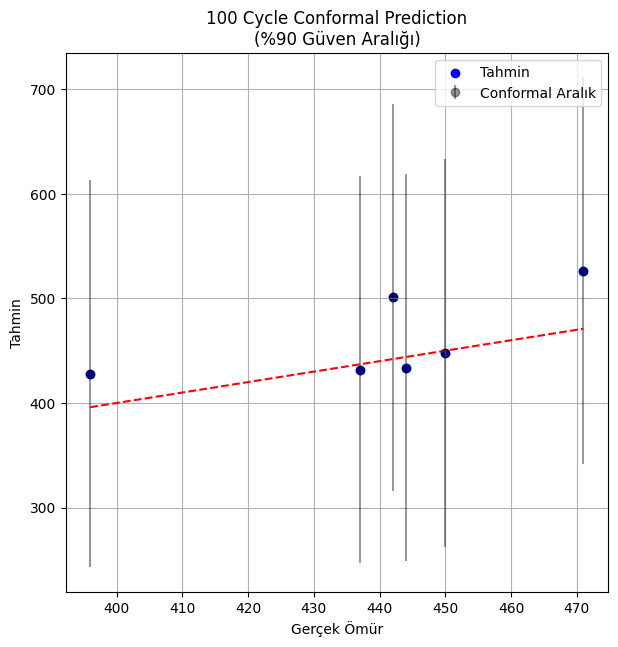

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, label="Tahmin", color="blue")
plt.errorbar(y_test, y_pred, 
             yerr=[y_pred - low, up - y_pred],
             fmt='o', color='black', alpha=0.4, label="Conformal Aralık")

plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)], 'r--')

plt.xlabel("Gerçek Ömür")
plt.ylabel("Tahmin")
plt.title("100 Cycle Conformal Prediction\n(%90 Güven Aralığı)")
plt.grid(True)
plt.legend()
plt.show()


Toplam satır: 117
Kullanılacak feature sayısı: 24
Temizlik sonrası satır sayısı: 117

=== n_cycles = 25 XGBoost Sonuçları ===
MAE : 150.80
R²  : -0.4088

=== n_cycles = 50 XGBoost Sonuçları ===
MAE : 105.61
R²  : 0.2984

=== n_cycles = 100 XGBoost Sonuçları ===
MAE : 53.90
R²  : 0.8246

=== 100 Cycle Cross Conformal Prediction ===
MAE (test): 53.90
q_alpha (interval yarıçapı, %90 güven): 237.96


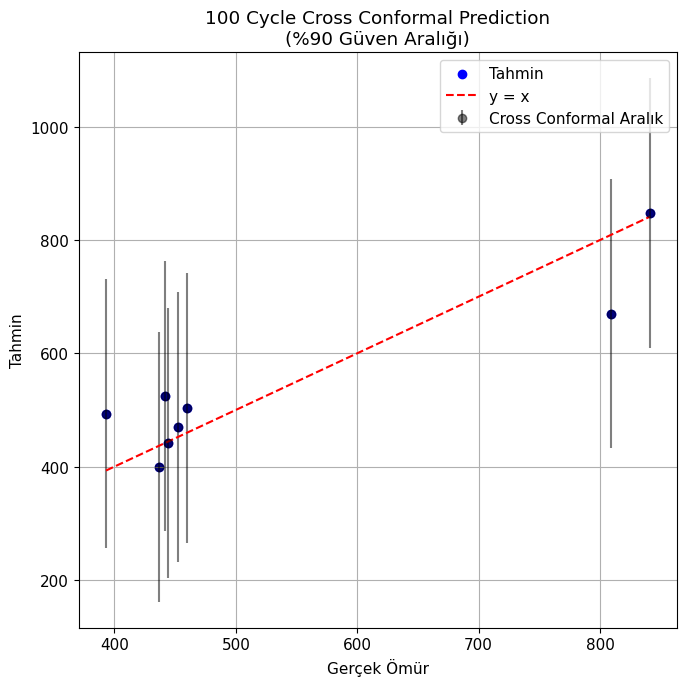


=== XGBoost Özet Sonuçları (Conformal öncesi) ===
n_cycles =  25 → MAE = 150.80, R² = -0.4088
n_cycles =  50 → MAE = 105.61, R² = 0.2984
n_cycles = 100 → MAE = 53.90, R² = 0.8246


In [24]:
# ============================================================
# TAM PIPELINE
# - features_early_cycles.csv yükler
# - XGBoost ile 25 / 50 / 100 cycle performansını hesaplar
# - 100 cycle için Cross Conformal Prediction uygular
# - Conformal grafiğini çizer
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams["font.size"] = 11

# ------------------------------------------------------------
# 1) Veriyi yükle ve temizle
# ------------------------------------------------------------
df = pd.read_csv("features_early_cycles.csv")
print("Toplam satır:", len(df))

df = df.copy()

# cycle_life'ı numerik yap
df["cycle_life"] = (
    df["cycle_life"]
    .astype(str)
    .str.strip()
    .str.replace(r"[\[\]]", "", regex=True)
)
df["cycle_life"] = pd.to_numeric(df["cycle_life"], errors="coerce")

# ------------------------------------------------------------
# 2) Feature kolonları
# ------------------------------------------------------------
candidate_features = [
    "Qd_mean", "Qd_std", "IR_mean", "IR_std", "Tavg_mean", "dQd_slope",
    "dqdv_peak_first", "dqdv_peak_last", "dqdv_peak_delta",
    "dqdv_peak_mean", "dqdv_peak_std", "dqdv_peak_slope",
    "dqdv_area_first", "dqdv_area_last", "dqdv_area_delta",
    "dqdv_area_mean", "dqdv_area_std", "dqdv_area_slope",
    "dqdv_peakpos_first", "dqdv_peakpos_last", "dqdv_peakpos_delta",
    "dqdv_peakpos_mean", "dqdv_peakpos_std", "dqdv_peakpos_slope",
]

feature_cols = [c for c in candidate_features if c in df.columns]
print("Kullanılacak feature sayısı:", len(feature_cols))

# NaN içeren satırları at
df = df.dropna(subset=["cycle_life"] + feature_cols)
print("Temizlik sonrası satır sayısı:", len(df))

# ------------------------------------------------------------
# 3) Yardımcı fonksiyon: XGBoost eğit ve değerlendir
# ------------------------------------------------------------
def train_xgb_basic(X, y, params):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mae, r2

# ------------------------------------------------------------
# 4) 25 / 50 / 100 cycle için XGBoost sonuçları
# ------------------------------------------------------------
params_25 = {
    "n_estimators": 300,
    "learning_rate": 0.01,
    "max_depth": 3,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "reg_lambda": 4.0,
    "reg_alpha": 3.0,
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist"
}

params_50 = {
    "n_estimators": 500,
    "learning_rate": 0.02,
    "max_depth": 4,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "reg_lambda": 3.0,
    "reg_alpha": 1.5,
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist"
}

params_100 = {
    "n_estimators": 800,
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.80,
    "colsample_bytree": 0.80,
    "reg_lambda": 2.0,
    "reg_alpha": 1.0,
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist"
}

results = {}

for n_cycles, params in zip(
    [25, 50, 100],
    [params_25, params_50, params_100]
):
    df_sub = df[df["n_cycles"] == n_cycles].copy()
    X = df_sub[feature_cols].values
    y = df_sub["cycle_life"].values

    model, mae, r2 = train_xgb_basic(X, y, params)
    results[n_cycles] = (mae, r2)
    print(f"\n=== n_cycles = {n_cycles} XGBoost Sonuçları ===")
    print(f"MAE : {mae:.2f}")
    print(f"R²  : {r2:.4f}")

# ------------------------------------------------------------
# 5) Cross Conformal Prediction fonksiyonu (regresyon)
# ------------------------------------------------------------
def cross_conformal_predict(X, y, model_params, alpha=0.1, n_splits=5):
    """
    Cross Conformal Prediction (regresyon)
    alpha = 0.1 -> %90 güven aralığı
    """
    # Outer split: train / test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # K-fold içinde residual topla
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    all_residuals = []

    for train_idx, cal_idx in kf.split(X_train):
        X_tr, X_cal = X_train[train_idx], X_train[cal_idx]
        y_tr, y_cal = y_train[train_idx], y_train[cal_idx]

        model = XGBRegressor(**model_params)
        model.fit(X_tr, y_tr)
        y_cal_pred = model.predict(X_cal)

        residuals = np.abs(y_cal - y_cal_pred)
        all_residuals.extend(residuals.tolist())

    all_residuals = np.array(all_residuals)
    q_alpha = np.quantile(all_residuals, 1 - alpha)

    # Son modeli tüm train üzerinde eğit
    final_model = XGBRegressor(**model_params)
    final_model.fit(X_train, y_train)

    # Test set için tahmin ve interval
    y_test_pred = final_model.predict(X_test)
    lower = y_test_pred - q_alpha
    upper = y_test_pred + q_alpha

    mae = mean_absolute_error(y_test, y_test_pred)

    return final_model, mae, q_alpha, y_test, y_test_pred, lower, upper

# ------------------------------------------------------------
# 6) 100 cycle için Cross Conformal Prediction
# ------------------------------------------------------------
df100 = df[df["n_cycles"] == 100].copy()
X100 = df100[feature_cols].values
y100 = df100["cycle_life"].values

model_ccp, mae_ccp, q_alpha_ccp, y_test, y_pred, low, up = cross_conformal_predict(
    X100, y100, params_100, alpha=0.1, n_splits=5
)

print("\n=== 100 Cycle Cross Conformal Prediction ===")
print(f"MAE (test): {mae_ccp:.2f}")
print(f"q_alpha (interval yarıçapı, %90 güven): {q_alpha_ccp:.2f}")

# ------------------------------------------------------------
# 7) Conformal grafiği çiz
# ------------------------------------------------------------
plt.figure()
plt.scatter(y_test, y_pred, label="Tahmin", color="blue")
plt.errorbar(
    y_test, y_pred,
    yerr=[y_pred - low, up - y_pred],
    fmt='o', color='black', alpha=0.5, label="Cross Conformal Aralık"
)

mn, mx = min(y_test), max(y_test)
plt.plot([mn, mx], [mn, mx], 'r--', label="y = x")

plt.xlabel("Gerçek Ömür")
plt.ylabel("Tahmin")
plt.title("100 Cycle Cross Conformal Prediction\n(%90 Güven Aralığı)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8) Özet sonuçları yazdır
# ------------------------------------------------------------
print("\n=== XGBoost Özet Sonuçları (Conformal öncesi) ===")
for n, (mae, r2) in results.items():
    print(f"n_cycles = {n:3d} → MAE = {mae:.2f}, R² = {r2:.4f}")
